<a href="https://colab.research.google.com/github/jaehakimm/Sentiment-analysis-tiktokcomment-lovepotiondrink/blob/main/lovepotion_Drink_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pythainlp torch transformers sentencepiece

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load Thai sentiment model
model_name = "airesearch/wangchanberta-base-att-spm-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Function to classify sentiment
def classify_sentiment_thai(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_label = torch.argmax(probs).item()

    # Map label to sentiment
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_map[sentiment_label]

# Example usage
thai_text = "วันนี้อากาศดีมากเลย"
print(classify_sentiment_thai(thai_text))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/282 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/905k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/423M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Neutral


In [ ]:
thai_text = "ร้อนมาก อารมณ์เสีย"
print(classify_sentiment_thai(thai_text))

Negative


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load Thai sentiment model
model_name = "airesearch/wangchanberta-base-att-spm-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Function to classify sentiment
def classify_sentiment_thai(text):
    if pd.isna(text) or not isinstance(text, str):
        return "Neutral"
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_label = torch.argmax(probs).item()

    # Map label to sentiment
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_map[sentiment_label]

# Load dataset
file_path = "/dataset_tiktok-comments-scraper_2025-03-24_03-33-35-788.csv"
df = pd.read_csv(file_path)

# Apply sentiment analysis
df["sentiment"] = df["text"].apply(classify_sentiment_thai)

# Save the results
df.to_csv("sentiment_results.csv", index=False)
print("Sentiment analysis completed and saved to 'sentiment_results.csv'.")


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sentiment analysis completed and saved to 'sentiment_results.csv'.


In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns

<ipython-input-36-5bb579d206ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})


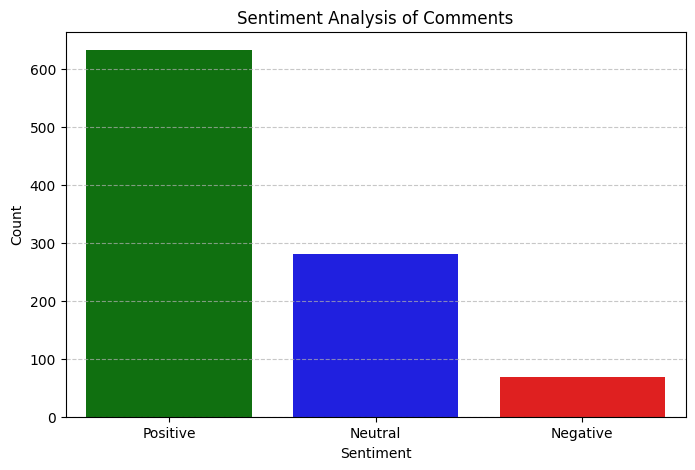

In [ ]:
sentiment_counts = df["sentiment"].value_counts()

# Plot sentiment distribution using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})
plt.title("Sentiment Analysis of Comments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
df_saved = pd.read_csv("sentiment_results.csv")
print("\nUpdated DataFrame:")
df_saved.head()


Updated DataFrame:


,avatarThumbnail,cid,createTime,createTimeISO,diggCount,input,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,submittedVideoUrl,text,uid,uniqueId,videoWebUrl,sentiment
0,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485203351748952833,1742784751,2025-03-24T02:52:31.000Z,1,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Team New Gen!🥰,6849654550107014145,oldgonesnewcome,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
1,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485034971444806418,1742745534,2025-03-23T15:58:54.000Z,1,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Top secret,6993857711843984410,ig_chawalwit_07,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
2,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485179142767411986,1742779108,2025-03-24T01:18:28.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Love 💕,6921898619626030081,poukkii0,https://www.tiktok.com/@iamsungstarwin/video/7...,Neutral
3,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485086530685371143,1742757547,2025-03-23T19:19:07.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Sweet portions,7420221998682457089,gdragxnox,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
4,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,7485051584575259423,1742749415,2025-03-23T17:03:35.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,สู้ๆนะคะ ทำสิ่งที่เราอยาหทำให้มันดีที่สุด หนูเ...,7316633523564348458,him_htuner,https://www.tiktok.com/@iamsungstarwin/video/7...,Neutral


In [ ]:
df_positive = df_saved[df_saved["sentiment"] == "Positive"]
df_positive

,avatarThumbnail,cid,createTime,createTimeISO,diggCount,input,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,submittedVideoUrl,text,uid,uniqueId,videoWebUrl,sentiment
0,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485203351748952833,1742784751,2025-03-24T02:52:31.000Z,1,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Team New Gen!🥰,6849654550107014145,oldgonesnewcome,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
1,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485034971444806418,1742745534,2025-03-23T15:58:54.000Z,1,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Top secret,6993857711843984410,ig_chawalwit_07,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
3,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485086530685371143,1742757547,2025-03-23T19:19:07.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Sweet portions,7420221998682457089,gdragxnox,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
5,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485191673527714578,1742782031,2025-03-24T02:07:11.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Good luck,6815545771020092422,slimmiezning,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
6,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7484979022524105490,1742732504,2025-03-23T12:21:44.000Z,15605,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,20.0,https://www.tiktok.com/@iamsungstarwin/video/7...,วัยรุ่นพันล้านนนน!!!!,7226268930245936133,lovepotion_officialth,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,7484980280634557192,1742732793,2025-03-23T12:26:33.000Z,2,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,รออุดหนุนครับ เชื่อใจน้องๆครับ อร่อยแน่ๆๆๆ,6817041274185663489,oah_kantima,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
978,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7484979892829209365,1742732704,2025-03-23T12:25:04.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,ไหววววววว ✌🏻,6812272200863941633,tatipongpun,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
979,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7484980840335082248,1742732923,2025-03-23T12:28:43.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,รอชิมมม,7421858368723174418,aja444705yt,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
981,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7484980822849618709,1742732923,2025-03-23T12:28:43.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,รอค่ะ,7380320336636756993,mny.37,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive


In [ ]:
df_negative = df_saved[df_saved["sentiment"] == "Negative"]
df_negative

,avatarThumbnail,cid,createTime,createTimeISO,diggCount,input,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,submittedVideoUrl,text,uid,uniqueId,videoWebUrl,sentiment
11,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485023534824293128,1742742865,2025-03-23T15:14:25.000Z,925,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,2.0,https://www.tiktok.com/@iamsungstarwin/video/7...,อร่อยไม่อร่อยคุณตันพูดเสมอลูกค้าจะเป็นคนบอกเอง...,6876090741698774018,tumphuket1988,https://www.tiktok.com/@iamsungstarwin/video/7...,Negative
19,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7484980924561720085,1742732951,2025-03-23T12:29:11.000Z,313,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,3.0,https://www.tiktok.com/@iamsungstarwin/video/7...,รอเหมาแล้วค่ะๆๆ🤩,7253720832279053318,barbiebombam_,https://www.tiktok.com/@iamsungstarwin/video/7...,Negative
28,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,7484989246709809928,1742734875,2025-03-23T13:01:15.000Z,22,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,7.484986e+18,NaN,https://www.tiktok.com/@iamsungstarwin/video/7...,มีนะครับ🤭,81797206180,iamsungstarwin,https://www.tiktok.com/@iamsungstarwin/video/7...,Negative
50,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,7485035131427603221,1742745563,2025-03-23T15:59:23.000Z,62,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,7.485030e+18,NaN,https://www.tiktok.com/@iamsungstarwin/video/7...,มีสติในการเสพข่าว ถ้าเพจข่าวหลักหรือทีวีไม่มีล...,6886742159695168513,ii_ploy_ii,https://www.tiktok.com/@iamsungstarwin/video/7...,Negative
119,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7485210695257129749,1742786440,2025-03-24T03:20:40.000Z,1,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,เก่งมากวัยรุ่นสมัยนี้🥰,6545258779360722945,intraratrachawangmea,https://www.tiktok.com/@iamsungstarwin/video/7...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7484986448253895431,1742734225,2025-03-23T12:50:25.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,สำเร็จแน่นอนคะ สู้ๆนะ,7353848999323075590,amy86604,https://www.tiktok.com/@iamsungstarwin/video/7...,Negative
898,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7484984879127462674,1742733866,2025-03-23T12:44:26.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,✌️,7287567847399031814,narumonkott,https://www.tiktok.com/@iamsungstarwin/video/7...,Negative
947,https://p16-common-sign-va.tiktokcdn-us.com/to...,7484980729181569793,1742732910,2025-03-23T12:28:30.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,รอซัพพอร์พเลิฟโพชั่นทุกทางค่ะ ❤️,6575453617724309506,sarisapla,https://www.tiktok.com/@iamsungstarwin/video/7...,Negative
950,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7484980676635673352,1742732883,2025-03-23T12:28:03.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,😱😱😱สุด,7405852219469448200,tsukuchi63,https://www.tiktok.com/@iamsungstarwin/video/7...,Negative


In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
df_negative = df_saved[df_saved["sentiment"] == "Negative"][["text", "sentiment"]]
df_negative

,text,sentiment
11,อร่อยไม่อร่อยคุณตันพูดเสมอลูกค้าจะเป็นคนบอกเอง...,Negative
19,รอเหมาแล้วค่ะๆๆ🤩,Negative
28,มีนะครับ🤭,Negative
50,มีสติในการเสพข่าว ถ้าเพจข่าวหลักหรือทีวีไม่มีล...,Negative
119,เก่งมากวัยรุ่นสมัยนี้🥰,Negative
120,ขอลงของเยอะๆได้มั้ยครับแบบเยอะๆเลยอะครับพอรู้ว...,Negative
132,ชอบเวลาที่ทำคลิปแบบนี้อะ ดูแล้วรู้สึกมี energy...,Negative
137,ผมอยากสมัคร ฝ่ายฝลิตครับ พร้อมเดินทางพร้อมทำงา...,Negative
146,รอชิมอยู่นะคะ ขอแบบไม่มีน้ำตาลด้วยจ้า🥰🥰🥰🥰,Negative
150,"@ткв889_✨""พี่ชายไฟ""✨36.",Negative


In [ ]:
pip install openai

Sentiment analysis completed and saved to 'sentiment_results_openai.csv'.

Updated DataFrame:
                                                text sentiment
0                                     Team New Gen!🥰  Positive
1                                         Top secret   Neutral
2                                             Love 💕  Positive
3                                     Sweet portions  Positive
4  สู้ๆนะคะ ทำสิ่งที่เราอยาหทำให้มันดีที่สุด หนูเ...  Positive


<ipython-input-64-a5f48d0ec8d3>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})


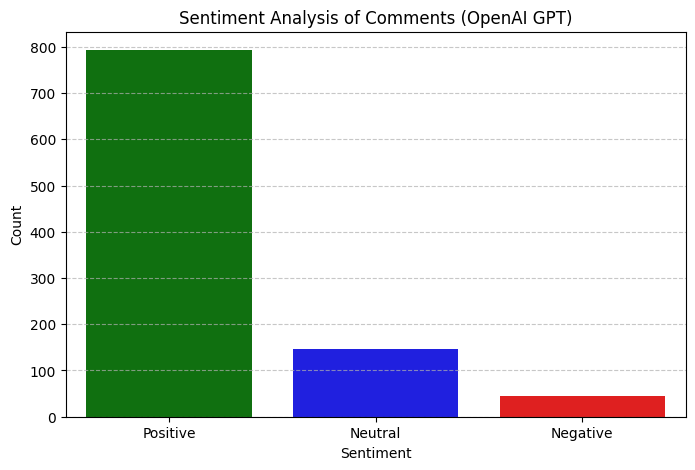

In [ ]:
import openai
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Initialize OpenAI client
client = openai.OpenAI(api_key="Your api key")

# ✅ Function to classify sentiment using OpenAI GPT
def classify_sentiment_openai(text):
    if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
        return "Neutral"

    prompt = f"""You are expert in sentiment analysis in Thai language and social network comment. Tell me whether the following sentence's sentiment is positive, negative, or neutral.
    Sentence: "{text}"
    Sentiment:"""

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.5,
            max_tokens=10
        )

        sentiment = response.choices[0].message.content.strip()

        # ✅ Ensure valid sentiment output
        valid_sentiments = {"Positive", "Neutral", "Negative"}
        return sentiment if sentiment in valid_sentiments else "Neutral"

    except Exception as e:
        print(f"Error processing text: {text[:30]}... - {e}")
        return "Neutral"

# ✅ Load dataset (Fixed file path issue)
file_path = "/dataset_tiktok-comments-scraper_2025-03-24_03-33-35-788.csv"
df = pd.read_csv(file_path)

# ✅ Ensure 'text' column exists
if "text" not in df.columns:
    raise ValueError("Error: The dataset does not contain a 'text' column.")

# ✅ Apply sentiment analysis
df["sentiment"] = df["text"].apply(classify_sentiment_openai)

# ✅ Save results
df.to_csv("sentiment_results_openai.csv", index=False)
print("Sentiment analysis completed and saved to 'sentiment_results_openai.csv'.")

# ✅ Display updated DataFrame
print("\nUpdated DataFrame:")
print(df[["text", "sentiment"]].head())

# ✅ Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="sentiment", palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})
plt.title("Sentiment Analysis of Comments (OpenAI GPT)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
df_saved_openai = pd.read_csv("sentiment_results_openai.csv")
df_saved_openai.head()

,avatarThumbnail,cid,createTime,createTimeISO,diggCount,input,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,submittedVideoUrl,text,uid,uniqueId,videoWebUrl,sentiment
0,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485203351748952833,1742784751,2025-03-24T02:52:31.000Z,1,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Team New Gen!🥰,6849654550107014145,oldgonesnewcome,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
1,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485034971444806418,1742745534,2025-03-23T15:58:54.000Z,1,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Top secret,6993857711843984410,ig_chawalwit_07,https://www.tiktok.com/@iamsungstarwin/video/7...,Neutral
2,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485179142767411986,1742779108,2025-03-24T01:18:28.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Love 💕,6921898619626030081,poukkii0,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
3,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485086530685371143,1742757547,2025-03-23T19:19:07.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Sweet portions,7420221998682457089,gdragxnox,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
4,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,7485051584575259423,1742749415,2025-03-23T17:03:35.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,สู้ๆนะคะ ทำสิ่งที่เราอยาหทำให้มันดีที่สุด หนูเ...,7316633523564348458,him_htuner,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive


In [ ]:
# ✅ Count occurrences of each sentiment
sentiment_counts = df_saved_openai["sentiment"].value_counts()

# ✅ Print sentiment counts
print("Sentiment Counts:")
print(sentiment_counts)

# ✅ Convert to dictionary (if needed)
sentiment_dict = sentiment_counts.to_dict()
print("\nSentiment Count Dictionary:")
print(sentiment_dict)


Sentiment Counts:
sentiment
Positive    793
Neutral     146
Negative     44
Name: count, dtype: int64

Sentiment Count Dictionary:
{'Positive': 793, 'Neutral': 146, 'Negative': 44}


In [ ]:
# ✅ Display all rows for Negative sentiment
df_negative_openai = df_saved_openai[df_saved_openai["sentiment"] == "Negative"][["text", "sentiment"]]

# ✅ Remove display limits
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Show full text content

# ✅ Display the full DataFrame
df_negative_openai


,text,sentiment
8,มีพวกเว็บพนันลงภาพว่าพี่โดนตำรวจจับค่ะ;^;;;,Negative
11,อร่อยไม่อร่อยคุณตันพูดเสมอลูกค้าจะเป็นคนบอกเองจากยอดขายทำออกมากหลายๆรสสุดท้ายมันจะเหลือแค่1-2ตัวเท่านั้นที่ขายได้,Negative
37,ไม่เคยชื้อของเด็กวันรุ่นแก๊งนี้เลยนะ เพราะไม่ได้ใช้ เเต่ถ้าน้ำ อุดหนุนเเน่นอน,Negative
38,ไม่มีน้ำตาลครับ,Negative
41,อันนี้ขอเสนอความเห็นนะคะ ถ้าน้ำสีเข้มม จะรู้สึกว่าผสมสีเยอะ แล้วไม่ดีต่อสุขภาพค่ะ จะไม่เลือกทานบ่อยเลยค่ะ,Negative
43,เจอมา มีแต่คนโพสว่าพี่โดนหมายค้น โดนจับบลาๆ ไม่จริงใช่ไหมคะ เห็นหลายโพสเลยใน ตต,Negative
52,ไม่ได้โดนจับนะ ไปเอาจากไหนมาาาา,Negative
55,มะกี้เพิ่งเลื่อนเจอเลยอ่า เลยว่าละ ข่าวปลอม,Negative
59,เห็นโปรไฟล์แล้วท้อเลย ทำไมพ่อแม่ไม่ดูแลหนูเรื่องการเสพสื่อคะ,Negative
68,เข้ายากมากธุรกิจนี้เจ้าตลาดแข็งๆเยอะ คู่แข่งเยอะมาก ไงก็ขอให้ประสบความสำเร็จครับ,Negative


In [ ]:
df_positive_openai = df_saved_openai[df_saved_openai["sentiment"] == "Positive"][["text", "sentiment"]]
df_positive_openai

,text,sentiment
0,Team New Gen!🥰,Positive
2,Love 💕,Positive
3,Sweet portions,Positive
4,สู้ๆนะคะ ทำสิ่งที่เราอยาหทำให้มันดีที่สุด หนูเชื่อว่าพวกพี่ทำได้ 💗💗,Positive
5,Good luck,Positive
6,วัยรุ่นพันล้านนนน!!!!,Positive
7,การเดินทางครั้งใหม่ได้เริ่มขี้นแล้ว ดุเดือดแน่นอน❤️,Positive
9,พวกเราตั้งใจทำมากๆ คั้บ อยากให้ทุกคนรอดูในทุกๆ EP เพราะรอบนี้เป็นความตั้งใจ ลุยกันเพื่อน อยู่ข้างๆเสมอ ลุย!!!!✨✨✨,Positive
10,พูดดีมาก กำไรไม่ใช่เรื่องเงินเสมอไป,Positive
12,ขอแบบไม่มีน้ำตาลด้วยครับ อยากสนับสนุนlove แต่กินน้ำตาลมากไม่ได้ 🥰🥰,Positive


In [1]:
pip install seaborn openai

In [2]:
pip install torch transformers sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Model details following the first script's structure
model_id = "scb10x/llama-3.2-typhoon-t1-3b-research-preview"
revision = "main"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)
model = AutoModelForSequenceClassification.from_pretrained(
    model_id,
    num_labels=3,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    revision=revision
)

# Load dataset
file_path = "/content/dataset_tiktok-comments-scraper_2025-03-24_03-33-35-788.csv"
df = pd.read_csv(file_path)

# Process each text as a message (similar structure to the first script)
sentiments = []

for text in df["text"]:
    if pd.isna(text) or not isinstance(text, str):
        sentiments.append("Neutral")
        continue

    messages = [{"role": "user", "content": text}]

    # Tokenize using chat-like structure
    input_ids = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=False,  # No need for generation prompt in classification
        return_tensors="pt"
    ).to(model.device)

    # Perform inference
    outputs = model(input_ids)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_label = torch.argmax(probs).item()

    # Map label to sentiment
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    sentiments.append(sentiment_map[sentiment_label])

# Store results in the DataFrame
df["sentiment"] = sentiments

# Save to CSV
df.to_csv("sentiment_results_typhoon.csv", index=False)
print("Sentiment analysis completed and saved to 'sentiment_results_typhoon.csv'.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/53.2k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/769 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/899 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at scb10x/llama-3.2-typhoon-t1-3b-research-preview and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sentiment analysis completed and saved to 'sentiment_results_typhoon.csv'.


<ipython-input-6-c62243a5ca16>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})


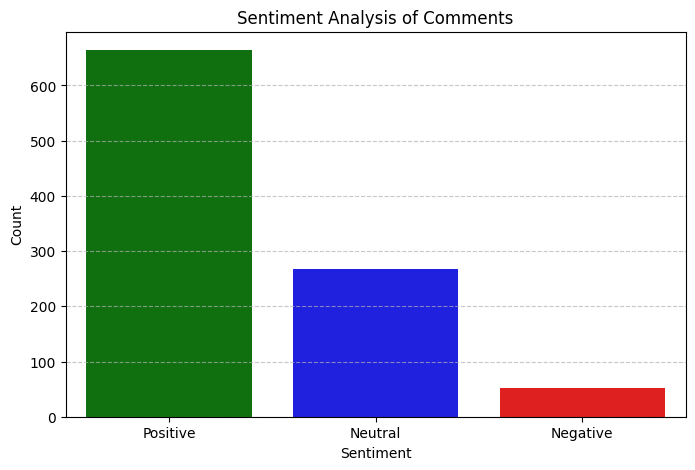

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each sentiment
sentiment_counts = df["sentiment"].value_counts()

# Plot sentiment distribution using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})
plt.title("Sentiment Analysis of Comments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [7]:
df_typhoon = pd.read_csv("sentiment_results_typhoon.csv")
df_typhoon.head()

,avatarThumbnail,cid,createTime,createTimeISO,diggCount,input,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,submittedVideoUrl,text,uid,uniqueId,videoWebUrl,sentiment
0,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485203351748952833,1742784751,2025-03-24T02:52:31.000Z,1,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Team New Gen!🥰,6849654550107014145,oldgonesnewcome,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
1,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485034971444806418,1742745534,2025-03-23T15:58:54.000Z,1,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Top secret,6993857711843984410,ig_chawalwit_07,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
2,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485179142767411986,1742779108,2025-03-24T01:18:28.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Love 💕,6921898619626030081,poukkii0,https://www.tiktok.com/@iamsungstarwin/video/7...,Positive
3,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,7485086530685371143,1742757547,2025-03-23T19:19:07.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,Sweet portions,7420221998682457089,gdragxnox,https://www.tiktok.com/@iamsungstarwin/video/7...,Negative
4,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,7485051584575259423,1742749415,2025-03-23T17:03:35.000Z,0,https://www.tiktok.com/@iamsungstarwin/video/7...,False,False,NaN,0.0,https://www.tiktok.com/@iamsungstarwin/video/7...,สู้ๆนะคะ ทำสิ่งที่เราอยาหทำให้มันดีที่สุด หนูเ...,7316633523564348458,him_htuner,https://www.tiktok.com/@iamsungstarwin/video/7...,Negative


In [10]:
# ✅ Remove display limits
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Show full text content

In [11]:
df_typhoon_positive = df_typhoon[df_typhoon["sentiment"] == "Positive"][["text", "sentiment"]]
df_typhoon_positive

,text,sentiment
0,Team New Gen!🥰,Positive
1,Top secret,Positive
2,Love 💕,Positive
6,วัยรุ่นพันล้านนนน!!!!,Positive
7,การเดินทางครั้งใหม่ได้เริ่มขี้นแล้ว ดุเดือดแน่นอน❤️,Positive
8,มีพวกเว็บพนันลงภาพว่าพี่โดนตำรวจจับค่ะ;^;;;,Positive
10,พูดดีมาก กำไรไม่ใช่เรื่องเงินเสมอไป,Positive
11,อร่อยไม่อร่อยคุณตันพูดเสมอลูกค้าจะเป็นคนบอกเองจากยอดขายทำออกมากหลายๆรสสุดท้ายมันจะเหลือแค่1-2ตัวเท่านั้นที่ขายได้,Positive
13,เป็นกลุ่มวัยรุ่นที่เจ๋งที่สุดละสำหรับผม,Positive
15,เราไม่ใช่ที่1 แต่เราคือ ที่สุด คำนี้ต้องไม่เกินจริง ❤,Positive


In [12]:
df_typhoon_negative = df_typhoon[df_typhoon["sentiment"] == "Negative"][["text", "sentiment"]]
df_typhoon_negative

,text,sentiment
3,Sweet portions,Negative
4,สู้ๆนะคะ ทำสิ่งที่เราอยาหทำให้มันดีที่สุด หนูเชื่อว่าพวกพี่ทำได้ 💗💗,Negative
64,ก่อนอื่นพี่เชื่อมั่นเสมอว่า ทีมนี้จะทำอะไรออกมาต้องทำได้อย่างดีและเติบโตสวยงามแน่นอน เป็นกำลังใจให้คะ #เลิฟทีมเลิฟ❤️✌️,Negative
89,ตอนทำรูปแบบขวดออกมาอย่าลืมทำเผื่อคนที่เขาเอาไปรีไซเคิลด้วยนะคั้บเช่นทำบ้อง,Negative
124,พร้อมสนับสนุนค่ะ,Negative
135,สนับสนุนครับผม ☺️,Negative
164,รอออออ สู้ๆทีมเลิฟโพชั่น,Negative
203,ซุงเก่งมาก สู้ๆน้อง,Negative
231,เป็นกำลังใจให้ครับ,Negative
320,เก่งมากคับพี่ซุง💖,Negative


In [13]:
# ✅ Count occurrences of each sentiment
sentiment_counts = df_typhoon["sentiment"].value_counts()

# ✅ Print sentiment counts
print("Sentiment Counts:")
print(sentiment_counts)

# ✅ Convert to dictionary (if needed)
sentiment_dict = sentiment_counts.to_dict()
print("\nSentiment Count Dictionary:")
print(sentiment_dict)

Sentiment Counts:
sentiment
Positive    664
Neutral     267
Negative     52
Name: count, dtype: int64

Sentiment Count Dictionary:
{'Positive': 664, 'Neutral': 267, 'Negative': 52}
